In [19]:
from utility_dfcutter import *
import utility_common as common
%matplotlib inline

In [8]:
MCtt = pd.read_pickle('/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mutau/mcttsys/ntuple_ttbar_inclusive_tauReweight.pkl')
MCtt0 = MCtt[MCtt.genCategory==15]

In [18]:
selection, nbjet, njet, variation = "mutau", ">1", None, "tauReweight"
MCtt = DFCutter(selection, nbjet, 'mctt', njet, "pickles_2016").getDataFrame(variation)
MCtt0 = MCtt[MCtt.genCategory==15]
temp = MCtt0.genTauOneDaughters

/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mutau/


In [9]:
temp = MCtt0.genTauOneDaughters
tauDecays = {}
for key in temp:
    if key in tauDecays:
        tauDecays[key] +=1
    else:
        tauDecays[key] = 1

In [10]:
MCtt0.genTauOneDaughters

2        11000
3        30010
14        3000
15       21000
16        1000
         ...  
44326     3000
44327    11000
44328     3000
44331    21000
44333    11000
Name: genTauOneDaughters, Length: 24179, dtype: int64

In [11]:
np.unique(MCtt.genTauOneDaughters)

array([      0,       2,      10,      11,     110,    1000,    1002,
          1020,    1100,    2010,    3000,    3100,    5000,   10010,
         10110,   11000,   11001,   11020,   11100,   11200,   12010,
         13000,   20010,   21000,   21001,   21100,   23000,   30010,
         31000,   41000,  100000, 1000000])

(0, 10974.0)

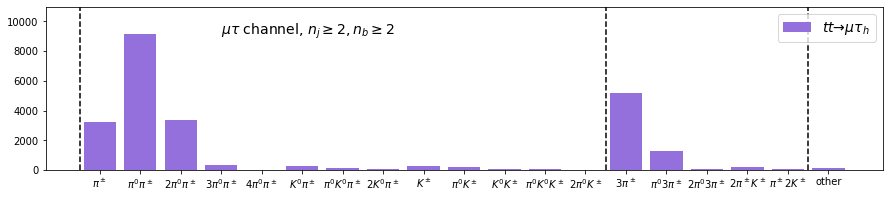

In [12]:
h = [tauDecays[key] for key in [1000,11000,21000,31000,41000,1100,11100,1020,
                                10,10010,110,10110,20010,
                                3000,13000,23000,  2010,1020]]
h += [temp.size-sum(h)]

plt.figure(facecolor="w",figsize=(15,3))
x = np.arange(len(h))

pi0,pic,k0,kc = r"$\pi^0$",r"$\pi^\pm$",r"$K^0$",r"$K^\pm$"

plt.xticks(x,[pic, pi0+pic,"2"+pi0+pic,"3"+pi0+pic,"4"+pi0+pic, k0+pic, pi0+k0+pic, "2"+k0+pic,
              kc, pi0+kc, k0+kc, pi0+k0+kc, "2"+pi0+kc,
              "3"+pic, pi0+"3"+pic, "2"+pi0+"3"+pic, "2"+pic+kc, pic+"2"+kc, "other" 
             ]
          )
plt.bar(x,h,color='mediumpurple',label=r"$tt\to \mu \tau_h$")
plt.legend(loc="upper right", fontsize=14)
#plt.grid(linestyle="--",alpha=0.5)
plt.axvline(-0.5,color="k",linestyle='--')
plt.axvline(12.5,color="k",linestyle='--')
plt.axvline(17.5,color="k",linestyle='--')
plt.text(3,max(h),r"$\mu \tau$ channel, $n_j\geq2, n_b\geq2$",color="k", fontsize=14)
plt.ylim(0,1.2*max(h))
# plt.savefig("../../plots/tauhDecay_mutau2.png",dpi=200)


# make new nGen.pkl

In [58]:
ngen_old = pd.read_pickle("../../data/pickles/ngen_old.pkl")
ngen_tt = pd.read_pickle("../../data/pickles/ngen_tt.pkl")
new = pd.concat([ngen_old,ngen_tt])

new.reset_index(drop=True,inplace=True)
new.drop(1,axis=0,inplace=True)
new.reset_index(drop=True,inplace=True)
new.to_pickle("../../data/pickles/ngen.pkl")

In [10]:
a = pd.read_pickle("../../data/counts/count_{}.pkl".format("TauHDecayReweight11000"+"Down")).acc[0]
b = pd.read_pickle("../../data/counts/count_{}.pkl".format("")).acc[0]

In [8]:
tauDecays

{2: 3,
 10: 57,
 11: 7,
 110: 23,
 1000: 962,
 1002: 16,
 1020: 22,
 1100: 65,
 2010: 62,
 3000: 1440,
 3100: 4,
 5000: 3,
 10010: 58,
 10110: 21,
 11000: 2578,
 11001: 15,
 11020: 1,
 11100: 33,
 11200: 2,
 12010: 4,
 13000: 358,
 20010: 10,
 21000: 1004,
 21100: 4,
 23000: 20,
 30010: 3,
 31000: 82,
 41000: 9}

In [1]:
import uproot

In [4]:
f = uproot.open("../../data/root/Run2016_ttsys_20200519.root")

In [14]:
v = ['genTauOneDaughters','genTauTwoDaughters','genCategory']
df = f['mutau']['bltTree_ttbar_inclusive_tauReweight'].pandas.df(v, namedecode="utf-8")

In [20]:
np.unique(df.genTauOneDaughters)

array([      0,  100000, 1000000], dtype=uint32)